## **Лабораторная работа 1**

### Задание 1

Проделать все представленные вычисления используя другой набор данных - файл **births.csv**

Следующие задания смотрите по тексту работы

_____________

Импортируем базовый набор библиотек:

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загружаем данные  и выводим первые 5 строк

In [133]:
births = pd.read_csv("births.csv")
births.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Делаем поле даты индексным и снова выводим первые 5 строе для контроля результата

In [134]:
births.set_index('Date', inplace = True)
births.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Преобразуем наше индексное поле в правильный формат datetime 

In [135]:
births.index = pd.to_datetime(births.index)

In [136]:
births.index[:5]

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

**Обратите внимание** - можно все сделать сразу в момент загрузки 

    passengers = pd.read_csv('passengers.csv', index_col = 'Month', parse_dates = True

в качестве примера преобразования данных выведем 5 строк средних данных за год

In [137]:
births.resample(rule = 'AS').mean().head()

,Births
Date,
1959-01-01,41.980822


теперь посмотрим как в Pandas  реализовано скользыщее среднее.

In [138]:
births.rolling(window = 3).mean().head()

,Births
Date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,32.333333
1959-01-04,31.000000
1959-01-05,35.000000


Базовый вариант отрисовки данных с помощью Pandas

<AxesSubplot:xlabel='Date'>

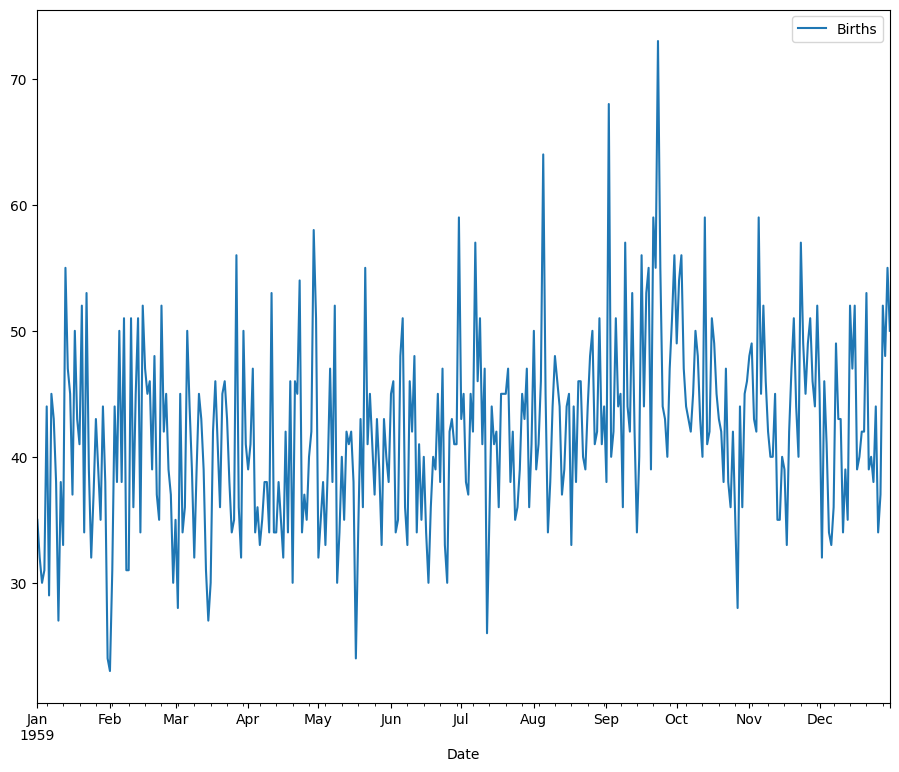

In [139]:
births.plot()

А теперь тоже самое но в расширенном варианте 

[Text(0.5, 1.0, 'Динамика рождаемости за 1959 год'),
 Text(0.5, 0, 'Месяцы'),
 Text(0, 0.5, 'Количество рождённых')]

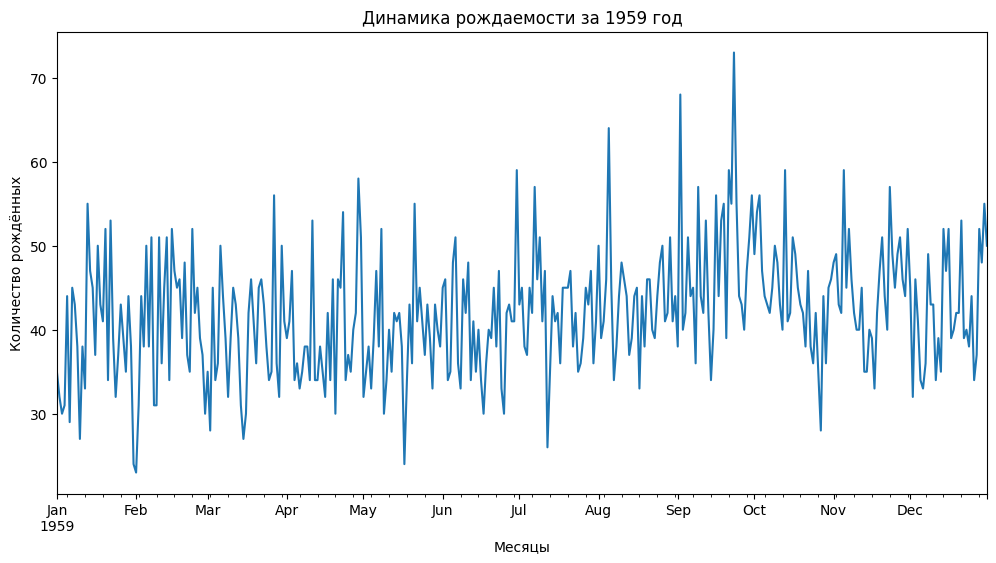

In [140]:
ax = births.plot(figsize = (12,6), legend = None)
ax.set(title = 'Динамика рождаемости за 1959 год', xlabel = 'Месяцы', ylabel = 'Количество рождённых')

________________
### Задание 2

Написать собственную функцию на языке Python вычисляющую экспотенциальное скользящее среднее и отрисовать ее на графике данных
с использованием Matplotlib. Сравнить с простым слоьзящим средним , сделать письменный вывод
_______________

Реализация функции для вычисления экспоненциального скользящего среднего

In [141]:
def get_ema(df, smooth):
    values = df.iloc[:,-1].to_list()
    result = [values.pop(0)]
    for value in values:
        result.append(round((value-result[-1])*smooth + result[-1], 2))
    return_df = df.copy()
    return_df[df.columns[0]] = result
    return return_df

Проверка работы функции путём сравнения с оригинальными данными

In [142]:
print(births)
print(get_ema(births, 0.5))

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]
            Births
Date              
1959-01-01   35.00
1959-01-02   33.50
1959-01-03   31.75
1959-01-04   31.38
1959-01-05   37.69
...            ...
1959-12-27   37.48
1959-12-28   44.74
1959-12-29   46.37
1959-12-30   50.69
1959-12-31   50.34

[365 rows x 1 columns]


Код ниже демонстрирует сравнение экспоненциального скользящего среднего с простым скользящим средним.

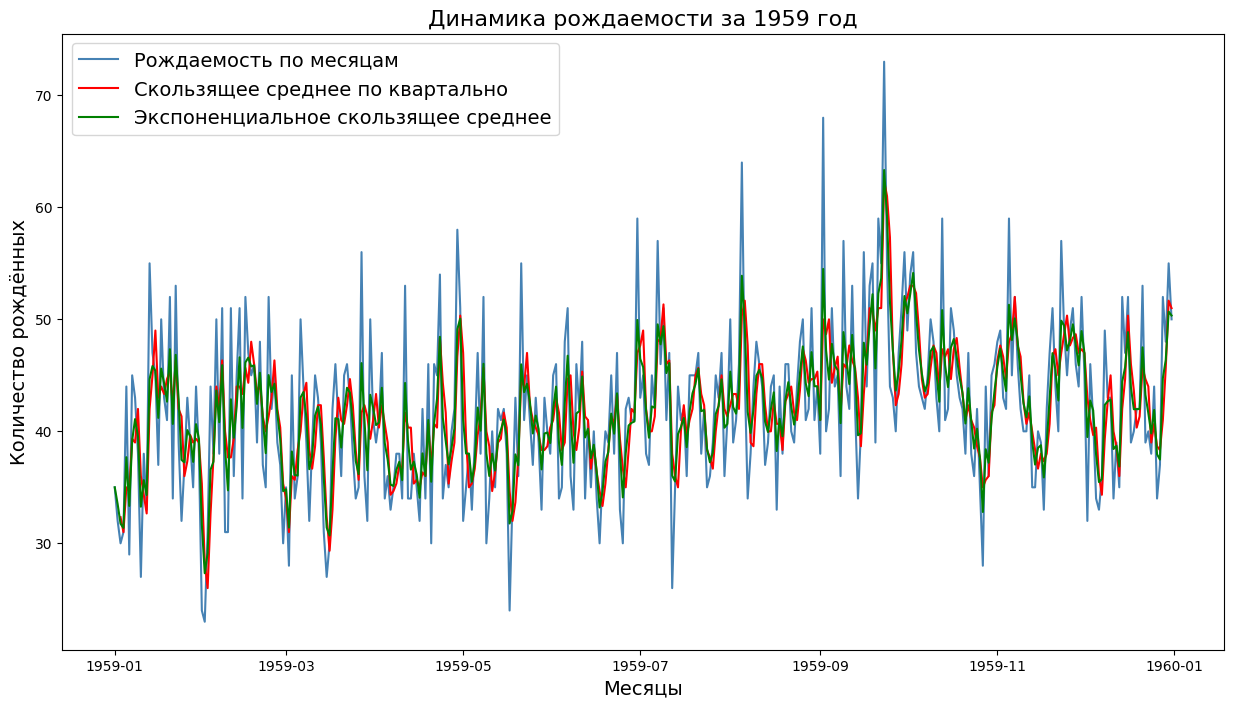

In [143]:
plt.figure(figsize = (15,8))
 
plt.plot(births, label = 'Рождаемость по месяцам', color = 'steelblue')
plt.plot(births.rolling(window = 3).mean(), label = 'Скользящее среднее по квартально', color = 'red')
plt.plot(get_ema(births, 0.5), label = 'Экспоненциальное скользящее среднее', color = 'green')

plt.legend(title = '', loc = 'upper left', fontsize = 14)
 
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество рождённых', fontsize = 14)
plt.title('Динамика рождаемости за 1959 год', fontsize = 16)
 
plt.show()

### Вывод:
В сравнении с простым скользящим средним, экспоненциальное скользящее среднее придаёт большое значение последним значением, и,
что можно увидеть на графике, быстрее реагирует на движение движение (перепады).

Импортируем библиотеку statsmodels для статистического анализа временного ряда

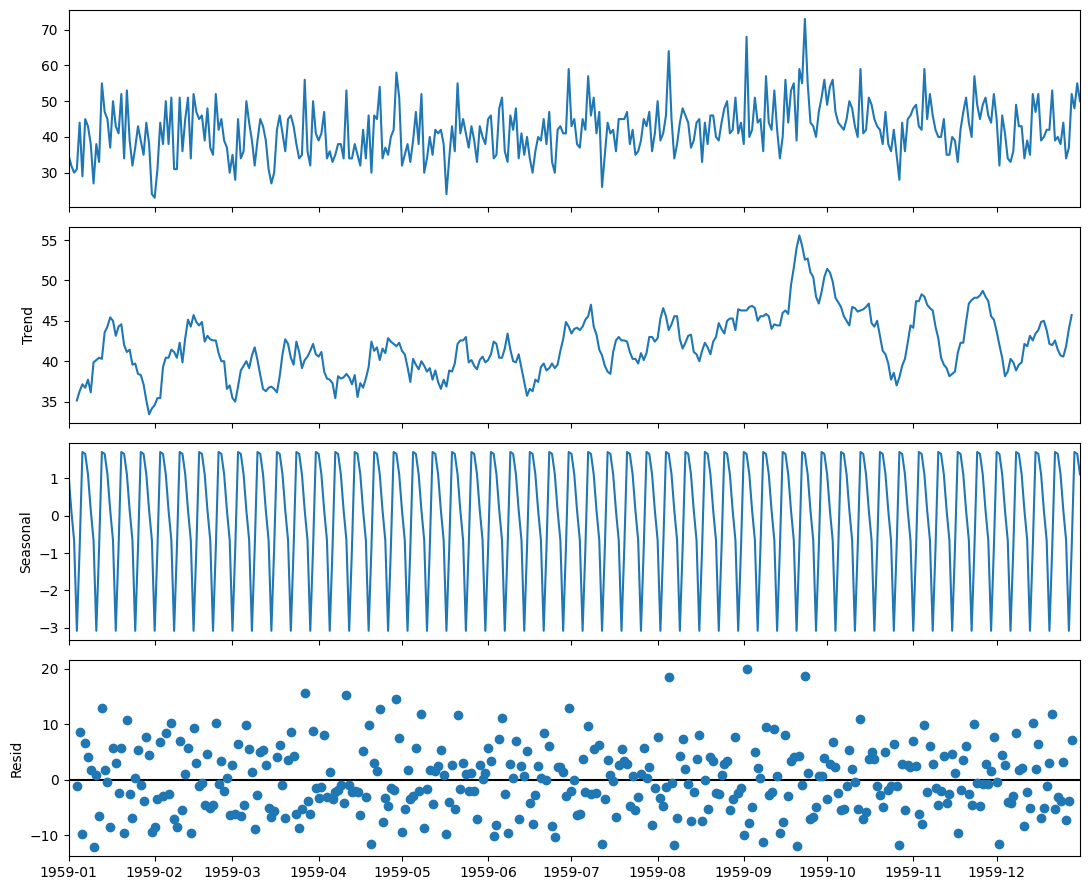

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
decompose = seasonal_decompose(births)
decompose.plot()
 
plt.show()

Проведем тест Дика-Фуллера

In [145]:
from statsmodels.tsa.stattools import adfuller
 
adf_test = adfuller(births['Births'])
 
print('p-value = ' + str(adf_test[1]))
print(adf_test[1] < 0.05)

p-value = 5.243412990149865e-05
True


______________________
### Задание 3

Сделать письменный вывод о временном ряде в новом датасете на основе проведенного анализа

**Внимание!** Ваша работа должна содержать работу только с новым набором данных
_________________________


### Общий вывод

Введём 2 гипотезы:

* H 0 : Временной ряд является нестационарным.
* H A : временной ряд является стационарным.

Поскольку тест Дика-Фуллера показал p-значение, которое меньше 0.05, то мы не можем принять нулевую гипотезу,
соответственно - временной ряд является стационарным.

Это подтверждается графиками выше. Ряд не имеет явного тренда, но в нём присутствует сезонность.